### Задача

В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Поверхностное изучение файлов

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df_calls = pd.read_csv('calls.csv')
df_int = pd.read_csv('internet.csv')
df_mess = pd.read_csv('messages.csv')
df_tarif = pd.read_csv('tariffs.csv')
df_user = pd.read_csv('users.csv')

In [2]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


В продолжительности звонка нули? Рассмотрим поближе.

<AxesSubplot:>

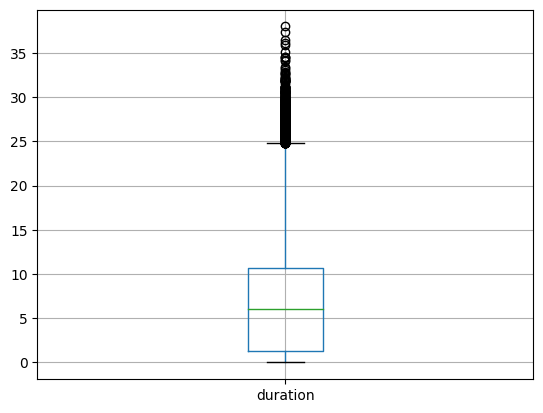

In [3]:
df_calls.boxplot('duration')

<AxesSubplot:ylabel='Frequency'>

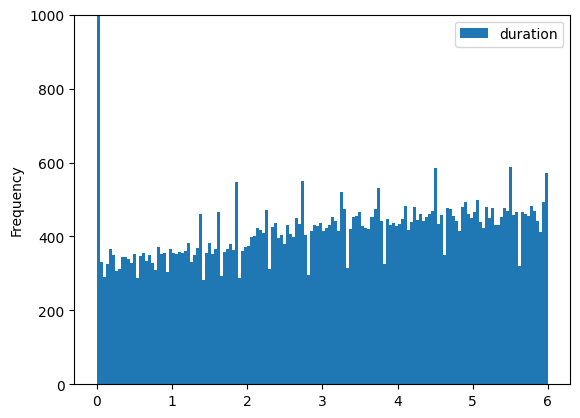

In [4]:
df_calls.plot(kind='hist', y='duration', bins=150, range=(0, 6), ylim=(0, 1000))

Почти 20% разговоров имеет продолжительность 0 и без уточняющих пояснений тяжело сделать что-либо с ними. Можно конечно распределить из равномерно поминутно либо посекундно по всей выборке, тогда мы пропорционально изменим распределение во всей выборке, но с точки зрения тарификации и платы за услуги мы исказим данные по выручке в абсолютных цыфрах. Прочитав комментарии в треде про эту проблему в "Slack" решено было(там), что это звонки малой длительности и просто происходила ошибка фиксации их длительности.

In [5]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [6]:
df_int.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Лишний столбец, который дублирует id строк, его можно будет удалить в будущем.

<AxesSubplot:>

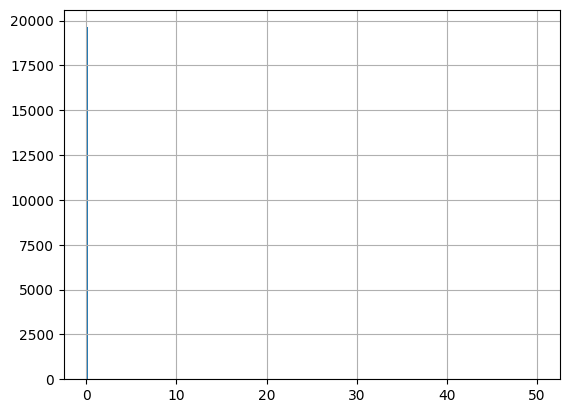

In [7]:
df_int['mb_used'].hist(bins=200, range=(0, 50))

Много нулевых значений, объяснение такое же как и у звонков.

In [8]:
df_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [9]:
df_mess.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [10]:
df_mess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [11]:
df_tarif

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [12]:
df_user.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [13]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Все данные выглядят удобоваримыми, не считая, что нужно всего лишь привести некоторые из них к нужным типам. Все пропуски и числа, такие как 0 в продолжительности разговора и интернет трафике, объяснимы. 

# Приведение к нужным типам

## Приведение даты к нужному типу 

In [14]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_int['session_date'] = pd.to_datetime(df_int['session_date'], format='%Y-%m-%d')
df_mess['message_date'] = pd.to_datetime(df_mess['message_date'], format='%Y-%m-%d')
df_user['churn_date'] = pd.to_datetime(df_user['churn_date'], format='%Y-%m-%d')
df_user['reg_date'] = pd.to_datetime(df_user['reg_date'], format='%Y-%m-%d')

In [15]:
df_int = df_int.drop(df_int.columns[[0]], axis='columns')    #уберем лишнюю колонку из таблицы интернет трафика

## Заменим нули в данных на случайные малые числа

In [16]:
from random import randint
def rep(a):
    if a == 0:
        return randint(1, 100)/100
    else:
        return a
df_calls['duration'] = df_calls['duration'].apply(rep)

array([[<AxesSubplot:title={'center':'duration'}>]], dtype=object)

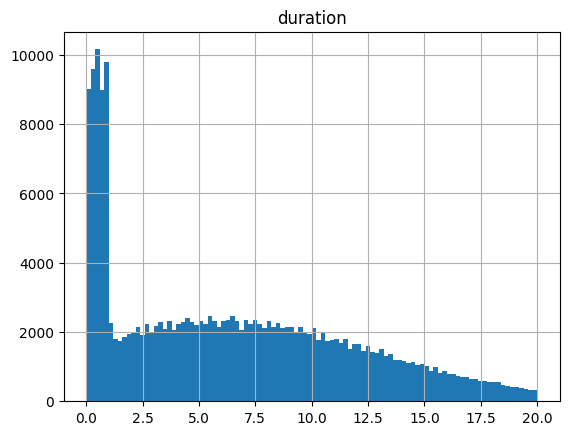

In [17]:
df_calls.hist('duration', bins=100, range=(0, 20))

In [18]:
df_int['mb_used'] = df_int['mb_used'].apply(rep)

In [19]:
print(df_calls.duplicated().sum())
print(df_int.duplicated().sum())
print(df_mess.duplicated().sum())
print(df_user.duplicated().sum())

0
0
0
0


Дубликатов не обнаружили

## Приведем к нужним типам минуты и мегабайты

In [20]:
import math
def round_all(a):    #функция округления в большую сторону
    return math.ceil(a)
df_calls['duration'] = df_calls['duration'].apply(round_all)
df_int['mb_used'] = df_int['mb_used'].apply(round_all)

### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [21]:
clients_calls = df_calls.pivot_table(index='user_id', columns=df_calls['call_date'].dt.month, values='duration', aggfunc=['sum', 'count'])
name_calls = [['calls_sum', 'calls_count'], [1,2,3,4,5,6,7,8,9,10,11,12]]    
index_calls = pd.MultiIndex.from_product(name_calls, names=['sum or count', 'month'])    #решил замутить вот так, создать мультииндекс нужный мне
clients_calls.columns = index_calls    #и заменить старый мультииндекс новым
clients_calls.head()    #увидел, что 500-492=8 клиентов не пользовались звонками

sum or count calls_sum                                                        \
month               1   2   3   4      5      6      7      8      9      10   
user_id                                                                        
1000               NaN NaN NaN NaN  164.0  187.0  346.0  418.0  478.0  363.0   
1001               NaN NaN NaN NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1002               NaN NaN NaN NaN    NaN  118.0  219.0  294.0  217.0  221.0   
1003               NaN NaN NaN NaN    NaN    NaN    NaN  392.0  990.0  866.0   
1004               NaN NaN NaN NaN   37.0  177.0  137.0  138.0  125.0  153.0   

sum or count  ... calls_count                                            \
month         ...          3   4     5     6     7     8      9      10   
user_id       ...                                                         
1000          ...         NaN NaN  22.0  43.0  47.0  52.0   58.0   57.0   
1001          ...         NaN NaN   NaN   NaN   NaN   NaN    NaN    NaN   
1002          ...         NaN NaN   NaN  15.0  26.0  42.0   36.0   33.0   
1003          ...         NaN NaN   NaN   NaN   NaN  55.0  134.0  108.0   
1004          ...         NaN NaN   9.0  31.0  22.0  19.0   26.0   29.0   

sum or count                
month            11     12  
user_id                     
1000           43.0   46.0  
1001           59.0   63.0  
1002           32.0   33.0  
1003          115.0  108.0  
1004           19.0   21.0  

[5 rows x 24 columns]

<AxesSubplot:ylabel='Frequency'>

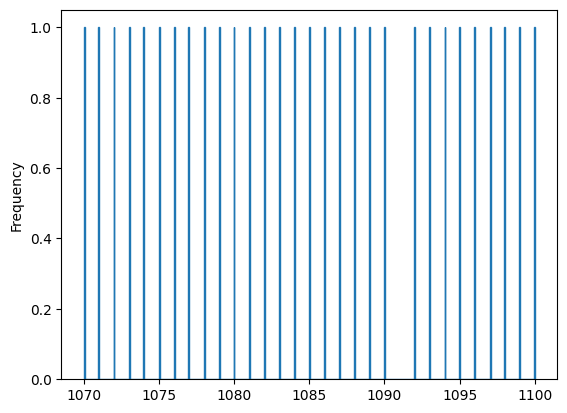

In [22]:
pd.Series(clients_calls.index.values).plot(kind='hist',histtype='step', linewidth=1, bins=500, range=(1070, 1100))

In [23]:
df_int.loc[df_int['user_id'] == 1091].head()

,id,mb_used,session_date,user_id
26130,1091_0,609,2018-09-06,1091
26131,1091_1,646,2018-06-16,1091
26132,1091_2,450,2018-12-31,1091
26133,1091_3,159,2018-08-21,1091
26134,1091_4,1238,2018-08-08,1091


In [24]:
df_mess.loc[df_mess['user_id'] == 1091].head()

,id,message_date,user_id
21447,1091_0,2018-09-23,1091
21448,1091_1,2018-09-04,1091
21449,1091_2,2018-08-11,1091
21450,1091_3,2018-09-02,1091
21451,1091_4,2018-10-16,1091


In [25]:
df_calls.loc[df_calls['user_id'] == 1091]

,id,call_date,duration,user_id


In [26]:
df_user.loc[df_user['user_id'] == 1091]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
91,1091,36,NaT,Набережные Челны,Вера,Суслова,2018-05-08,ultra


Ничего необычного с клиентами, которые не пользуются звонками нет, остальных не будем детально изучать т.к. не это цель задания, не использовать тариф для звонков вполне нормально например для плохослышащих клиентов.

### Количество отправленных сообщений по месяцам

In [27]:
clients_mess = df_mess.pivot_table(index='user_id', columns=df_mess['message_date'].dt.month, values='id', aggfunc='count')
name_mess = [['mess_count'], [1,2,3,4,5,6,7,8,9,10,11,12]]
index_mess = pd.MultiIndex.from_product(name_mess, names=['count', 'month'])
clients_mess.columns = index_mess
clients_mess.head()

count   mess_count                                                             \
month           1     2     3     4     5      6      7      8      9      10   
user_id                                                                         
1000           NaN   NaN   NaN   NaN  22.0   60.0   75.0   81.0   57.0   73.0   
1002           NaN   NaN   NaN   NaN   NaN    4.0   11.0   13.0    4.0   10.0   
1003           NaN   NaN   NaN   NaN   NaN    NaN    NaN   37.0   91.0   83.0   
1004           NaN   NaN   NaN   NaN  95.0  134.0  181.0  151.0  146.0  165.0   
1005           7.0  38.0  56.0  41.0  42.0   47.0   56.0   64.0   52.0   44.0   

count                  
month       11     12  
user_id                
1000      58.0   70.0  
1002      16.0   12.0  
1003      94.0   75.0  
1004     158.0  162.0  
1005      51.0   54.0

### Объем израсходованного интернет-трафика по месяцам

In [28]:
clients_int = df_int.pivot_table(index='user_id', columns=df_int['session_date'].dt.month, values='mb_used', aggfunc='sum')
name_int = [['int_sum'], [1,2,3,4,5,6,7,8,9,10,11,12]]    
index_int = pd.MultiIndex.from_product(name_int, names=['sum', 'month']) 
clients_int.columns = index_int 

In [29]:
global_tabl = clients_calls.merge(clients_int, on='user_id', how='outer')
global_table = global_tabl.merge(clients_mess, on='user_id', how='outer')
global_table.head()

sum or count calls_sum                                                        \
month               1   2   3   4      5      6      7      8      9      10   
user_id                                                                        
1000               NaN NaN NaN NaN  164.0  187.0  346.0  418.0  478.0  363.0   
1001               NaN NaN NaN NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1002               NaN NaN NaN NaN    NaN  118.0  219.0  294.0  217.0  221.0   
1003               NaN NaN NaN NaN    NaN    NaN    NaN  392.0  990.0  866.0   
1004               NaN NaN NaN NaN   37.0  177.0  137.0  138.0  125.0  153.0   

sum or count  ... mess_count                                               \
month         ...         3   4     5      6      7      8      9      10   
user_id       ...                                                           
1000          ...        NaN NaN  22.0   60.0   75.0   81.0   57.0   73.0   
1001          ...        NaN NaN   NaN    NaN    NaN    NaN    NaN    NaN   
1002          ...        NaN NaN   NaN    4.0   11.0   13.0    4.0   10.0   
1003          ...        NaN NaN   NaN    NaN    NaN   37.0   91.0   83.0   
1004          ...        NaN NaN  95.0  134.0  181.0  151.0  146.0  165.0   

sum or count                
month            11     12  
user_id                     
1000           58.0   70.0  
1001            NaN    NaN  
1002           16.0   12.0  
1003           94.0   75.0  
1004          158.0  162.0  

[5 rows x 48 columns]

In [30]:
df_calls.loc[df_calls['user_id'] == 1128]

,id,call_date,duration,user_id


In [31]:
df_int.loc[df_int['user_id'] == 1128]

,id,mb_used,session_date,user_id


In [32]:
df_mess.loc[df_mess['user_id'] == 1128]

,id,message_date,user_id


In [33]:
df_user.loc[df_user['user_id'] == 1128]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


In [34]:
df_calls.loc[df_calls['user_id'] == 1371]

,id,call_date,duration,user_id


In [35]:
df_int.loc[df_int['user_id'] == 1371]

,id,mb_used,session_date,user_id


In [36]:
df_mess.loc[df_mess['user_id'] == 1371]

,id,message_date,user_id


In [37]:
df_user.loc[df_user['user_id'] == 1371]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


Надо будет добавить этих двух клиентов в таблицу, хоть они и не пользовались услугами, но они уже заплптили за тариф

In [38]:
k = 1
new_columns_name = []
for i in range(len(global_table.columns)):    #новый массив с именами колонок, для того чтобы заменить им мультииндексные названия в таблице
    if k == 13:
        k = 1
    new_columns_name.append(global_table.columns[i][0] + '_' + str(k))
    k = k + 1

In [39]:
global_table.columns = new_columns_name
global_table.head()

,calls_sum_1,calls_sum_2,calls_sum_3,calls_sum_4,calls_sum_5,calls_sum_6,calls_sum_7,calls_sum_8,calls_sum_9,calls_sum_10,...,mess_count_3,mess_count_4,mess_count_5,mess_count_6,mess_count_7,mess_count_8,mess_count_9,mess_count_10,mess_count_11,mess_count_12
user_id,,,,,,,,,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,164.0,187.0,346.0,418.0,478.0,363.0,...,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,118.0,219.0,294.0,217.0,221.0,...,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.0,990.0,866.0,...,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0
1004,NaN,NaN,NaN,NaN,37.0,177.0,137.0,138.0,125.0,153.0,...,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0


In [40]:
global_table = global_table.merge(df_user, on='user_id', how='outer')
global_table = global_table.fillna(0)

In [41]:
def many(row):
    if row['reg_date'].month > i:
        return 0
    elif row['churn_date'] == 0:
        if row['calls_sum_' + str(i)] <= int(df_tarif.loc[df_tarif['tariff_name'] == row['tariff'], 'minutes_included']):
            minute = 0
        else:
            minute = row['calls_sum_' + str(i)] - int(df_tarif.loc[df_tarif['tariff_name'] == row['tariff'], 'minutes_included'])
        if row['int_sum_' + str(i)] <= int(df_tarif.loc[df_tarif['tariff_name'] == row['tariff'], 'mb_per_month_included']):
            internet = 0
        else:
            internet = round_all((row['int_sum_' + str(i)] - int(df_tarif.loc[df_tarif['tariff_name'] == row['tariff'], 'mb_per_month_included']))/1024)
        if row['mess_count_' + str(i)] <= int(df_tarif.loc[df_tarif['tariff_name'] == row['tariff'], 'messages_included']):
            message = 0
        else:
            message = row['mess_count_' + str(i)] - int(df_tarif.loc[df_tarif['tariff_name'] == row['tariff'], 'messages_included'])
        return minute*int(df_tarif.loc[df_tarif['tariff_name'] == row['tariff'], 'rub_per_minute']) + internet*int(df_tarif.loc[df_tarif['tariff_name'] == row['tariff'], 'rub_per_gb']) + int(df_tarif.loc[df_tarif['tariff_name'] == row['tariff'], 'rub_monthly_fee'])
    elif row['churn_date'].month >= i:
        if row['calls_sum_' + str(i)] <= int(df_tarif.loc[df_tarif['tariff_name'] == row['tariff'], 'minutes_included']):
            minute = 0
        else:
            minute = row['calls_sum_' + str(i)] - int(df_tarif.loc[df_tarif['tariff_name'] == row['tariff'], 'minutes_included'])
        if row['int_sum_' + str(i)] <= int(df_tarif.loc[df_tarif['tariff_name'] == row['tariff'], 'mb_per_month_included']):
            internet = 0
        else:
            internet = round_all((row['int_sum_' + str(i)] - int(df_tarif.loc[df_tarif['tariff_name'] == row['tariff'], 'mb_per_month_included']))/1024)
        if row['mess_count_' + str(i)] <= int(df_tarif.loc[df_tarif['tariff_name'] == row['tariff'], 'messages_included']):
            message = 0
        else:
            message = row['mess_count_' + str(i)] - int(df_tarif.loc[df_tarif['tariff_name'] == row['tariff'], 'messages_included'])
        return minute*int(df_tarif.loc[df_tarif['tariff_name'] == row['tariff'], 'rub_per_minute']) + internet*int(df_tarif.loc[df_tarif['tariff_name'] == row['tariff'], 'rub_per_gb']) + int(df_tarif.loc[df_tarif['tariff_name'] == row['tariff'], 'rub_monthly_fee'])
    else:
        return 0


In [42]:
for i in range(1,13):
    global_table['cash_month_' + str(i)] = global_table.apply(many, axis=1).astype(int)

In [43]:
group_table = global_table.groupby('tariff').sum().drop(global_table.groupby('tariff').sum().columns[[0, 49]], axis='columns')
group_table    #убрали дополнительно числовые суммирования 'id' клиента и возраст

,calls_sum_1,calls_sum_2,calls_sum_3,calls_sum_4,calls_sum_5,calls_sum_6,calls_sum_7,calls_sum_8,calls_sum_9,calls_sum_10,...,cash_month_3,cash_month_4,cash_month_5,cash_month_6,cash_month_7,cash_month_8,cash_month_9,cash_month_10,cash_month_11,cash_month_12
tariff,,,,,,,,,,,,,,,,,,,,,
smart,7128.0,17766.0,30841.0,42224.0,56175.0,66699.0,84277.0,101800.0,114421.0,128859.0,...,89592,107953,169632,197970,247052,312129,326936,403031,426136,534291
ultra,3968.0,7312.0,18614.0,25854.0,35166.0,41364.0,50987.0,56129.0,63669.0,70458.0,...,74550,110100,138150,171450,193050,222900,232800,254250,280500,299250


In [44]:
group_table['clients'] = global_table.groupby('tariff')['tariff'].count()    # добавили количество клиентов каждого тарифа
group_table

,calls_sum_1,calls_sum_2,calls_sum_3,calls_sum_4,calls_sum_5,calls_sum_6,calls_sum_7,calls_sum_8,calls_sum_9,calls_sum_10,...,cash_month_4,cash_month_5,cash_month_6,cash_month_7,cash_month_8,cash_month_9,cash_month_10,cash_month_11,cash_month_12,clients
tariff,,,,,,,,,,,,,,,,,,,,,
smart,7128.0,17766.0,30841.0,42224.0,56175.0,66699.0,84277.0,101800.0,114421.0,128859.0,...,107953,169632,197970,247052,312129,326936,403031,426136,534291,351
ultra,3968.0,7312.0,18614.0,25854.0,35166.0,41364.0,50987.0,56129.0,63669.0,70458.0,...,110100,138150,171450,193050,222900,232800,254250,280500,299250,149


In [45]:
df_user_month = df_user
df_user_month['churn_month'] = df_user['churn_date'].dt.month
df_user_month['reg_month'] = df_user['reg_date'].dt.month

In [46]:
smart = 0    #стартовое количество клиентов
ultra = 0
for i in range(1, 13):    #цикл добавления столбцов
    smart = smart + list(df_user_month.query('tariff == "smart"')['reg_month']).count(i)    #делаем срез по тарифу и считаем количество подключений в месяц i
    ultra = ultra + list(df_user_month.query('tariff == "ultra"')['reg_month']).count(i)
    group_table['client_' + str(i)] = [smart, ultra]    #создаем столбец месяца из количества подключений из этого месяца 
    smart = smart - list(df_user_month.query('tariff == "smart"')['churn_month']).count(i)    #после того как занесли в столбец вычитаем из еоличества подключений количество отключений
    ultra = ultra - list(df_user_month.query('tariff == "ultra"')['churn_month']).count(i)

In [47]:
group_table

,calls_sum_1,calls_sum_2,calls_sum_3,calls_sum_4,calls_sum_5,calls_sum_6,calls_sum_7,calls_sum_8,calls_sum_9,calls_sum_10,...,client_3,client_4,client_5,client_6,client_7,client_8,client_9,client_10,client_11,client_12
tariff,,,,,,,,,,,,,,,,,,,,,
smart,7128.0,17766.0,30841.0,42224.0,56175.0,66699.0,84277.0,101800.0,114421.0,128859.0,...,77,112,141,164,201,235,260,294,316,338
ultra,3968.0,7312.0,18614.0,25854.0,35166.0,41364.0,50987.0,56129.0,63669.0,70458.0,...,37,55,67,84,91,107,115,123,134,140


In [48]:
group_table.columns

Index(['calls_sum_1', 'calls_sum_2', 'calls_sum_3', 'calls_sum_4',
       'calls_sum_5', 'calls_sum_6', 'calls_sum_7', 'calls_sum_8',
       'calls_sum_9', 'calls_sum_10', 'calls_sum_11', 'calls_sum_12',
       'calls_count_1', 'calls_count_2', 'calls_count_3', 'calls_count_4',
       'calls_count_5', 'calls_count_6', 'calls_count_7', 'calls_count_8',
       'calls_count_9', 'calls_count_10', 'calls_count_11', 'calls_count_12',
       'int_sum_1', 'int_sum_2', 'int_sum_3', 'int_sum_4', 'int_sum_5',
       'int_sum_6', 'int_sum_7', 'int_sum_8', 'int_sum_9', 'int_sum_10',
       'int_sum_11', 'int_sum_12', 'mess_count_1', 'mess_count_2',
       'mess_count_3', 'mess_count_4', 'mess_count_5', 'mess_count_6',
       'mess_count_7', 'mess_count_8', 'mess_count_9', 'mess_count_10',
       'mess_count_11', 'mess_count_12', 'cash_month_1', 'cash_month_2',
       'cash_month_3', 'cash_month_4', 'cash_month_5', 'cash_month_6',
       'cash_month_7', 'cash_month_8', 'cash_month_9', 'cash_month_10

In [49]:
data_smart = {'clients':list(group_table.loc['smart', ['client_1', 'client_2',
       'client_3', 'client_4', 'client_5', 'client_6', 'client_7', 'client_8',
       'client_9', 'client_10', 'client_11', 'client_12']]), 
       'calls_time':list(group_table.loc['smart', ['calls_sum_1', 'calls_sum_2', 'calls_sum_3', 'calls_sum_4',
       'calls_sum_5', 'calls_sum_6', 'calls_sum_7', 'calls_sum_8',
       'calls_sum_9', 'calls_sum_10', 'calls_sum_11', 'calls_sum_12']]),
       'calls':list(group_table.loc['smart', ['calls_count_1', 'calls_count_2', 'calls_count_3', 'calls_count_4',
       'calls_count_5', 'calls_count_6', 'calls_count_7', 'calls_count_8',
       'calls_count_9', 'calls_count_10', 'calls_count_11', 'calls_count_12']]),
       'mb_int':list(group_table.loc['smart', ['int_sum_1', 'int_sum_2', 'int_sum_3', 'int_sum_4', 'int_sum_5',
       'int_sum_6', 'int_sum_7', 'int_sum_8', 'int_sum_9', 'int_sum_10',
       'int_sum_11', 'int_sum_12']]),
       'messages':list(group_table.loc['smart', ['mess_count_1', 'mess_count_2',
       'mess_count_3', 'mess_count_4', 'mess_count_5', 'mess_count_6',
       'mess_count_7', 'mess_count_8', 'mess_count_9', 'mess_count_10',
       'mess_count_11', 'mess_count_12']]),
       'cash':list(group_table.loc['smart', ['cash_month_1', 'cash_month_2',
       'cash_month_3', 'cash_month_4', 'cash_month_5', 'cash_month_6',
       'cash_month_7', 'cash_month_8', 'cash_month_9', 'cash_month_10',
       'cash_month_11', 'cash_month_12']])}
data_ultra = {'clients':list(group_table.loc['ultra', ['client_1', 'client_2',
       'client_3', 'client_4', 'client_5', 'client_6', 'client_7', 'client_8',
       'client_9', 'client_10', 'client_11', 'client_12']]), 
       'calls_time':list(group_table.loc['ultra', ['calls_sum_1', 'calls_sum_2', 'calls_sum_3', 'calls_sum_4',
       'calls_sum_5', 'calls_sum_6', 'calls_sum_7', 'calls_sum_8',
       'calls_sum_9', 'calls_sum_10', 'calls_sum_11', 'calls_sum_12']]),
       'calls':list(group_table.loc['ultra', ['calls_count_1', 'calls_count_2', 'calls_count_3', 'calls_count_4',
       'calls_count_5', 'calls_count_6', 'calls_count_7', 'calls_count_8',
       'calls_count_9', 'calls_count_10', 'calls_count_11', 'calls_count_12']]),
       'mb_int':list(group_table.loc['ultra', ['int_sum_1', 'int_sum_2', 'int_sum_3', 'int_sum_4', 'int_sum_5',
       'int_sum_6', 'int_sum_7', 'int_sum_8', 'int_sum_9', 'int_sum_10',
       'int_sum_11', 'int_sum_12']]),
       'messages':list(group_table.loc['ultra', ['mess_count_1', 'mess_count_2',
       'mess_count_3', 'mess_count_4', 'mess_count_5', 'mess_count_6',
       'mess_count_7', 'mess_count_8', 'mess_count_9', 'mess_count_10',
       'mess_count_11', 'mess_count_12']]),
       'cash':list(group_table.loc['ultra', ['cash_month_1', 'cash_month_2',
       'cash_month_3', 'cash_month_4', 'cash_month_5', 'cash_month_6',
       'cash_month_7', 'cash_month_8', 'cash_month_9', 'cash_month_10',
       'cash_month_11', 'cash_month_12']])}
chart_smart = pd.DataFrame(data_smart)    
chart_ultra = pd.DataFrame(data_ultra)

In [50]:
chart_smart    #помесячная таблица тарифа для пользователей, первый столбец количество, общее время звонков, количество звонков, израсходованный интернет, сообщения, и общая плата 

,clients,calls_time,calls,mb_int,messages,cash
0,34.0,7128.0,941.0,289972.0,620.0,24522.0
1,58.0,17766.0,2331.0,673806.0,1397.0,48112.0
2,77.0,30841.0,4183.0,1165103.0,2453.0,89592.0
3,112.0,42224.0,5747.0,1510441.0,3443.0,107953.0
4,141.0,56175.0,7789.0,2232418.0,4762.0,169632.0
5,164.0,66699.0,9110.0,2594881.0,5478.0,197970.0
6,201.0,84277.0,11402.0,3170051.0,6784.0,247052.0
7,235.0,101800.0,13860.0,3910450.0,7905.0,312129.0
8,260.0,114421.0,15482.0,4246480.0,8746.0,326936.0
9,294.0,128859.0,17629.0,4935335.0,9927.0,403031.0


In [51]:
chart_ultra

,clients,calls_time,calls,mb_int,messages,cash
0,9.0,3968.0,535.0,118392.0,304.0,17550.0
1,24.0,7312.0,997.0,282920.0,527.0,47400.0
2,37.0,18614.0,2504.0,649480.0,1195.0,74550.0
3,55.0,25854.0,3525.0,926489.0,1736.0,110100.0
4,67.0,35166.0,4858.0,1298674.0,2536.0,138150.0
5,84.0,41364.0,5606.0,1591290.0,3505.0,171450.0
6,91.0,50987.0,6896.0,1867008.0,4536.0,193050.0
7,107.0,56129.0,7628.0,2096759.0,5183.0,222900.0
8,115.0,63669.0,8579.0,2210765.0,6013.0,232800.0
9,123.0,70458.0,9517.0,2468061.0,7187.0,254250.0


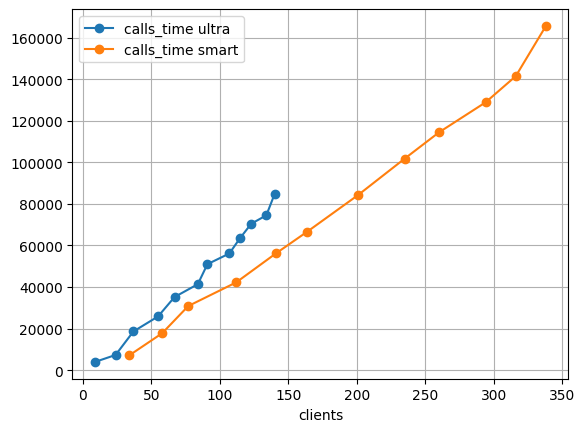

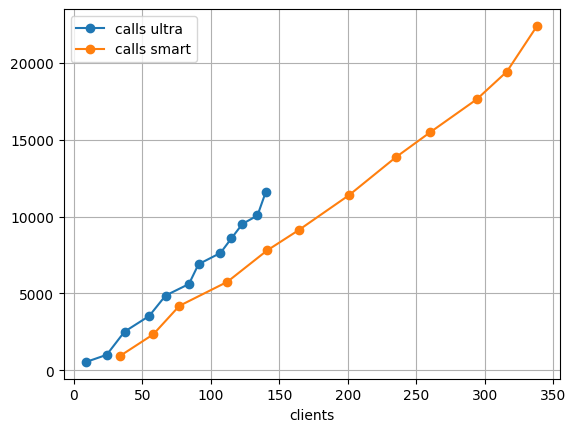

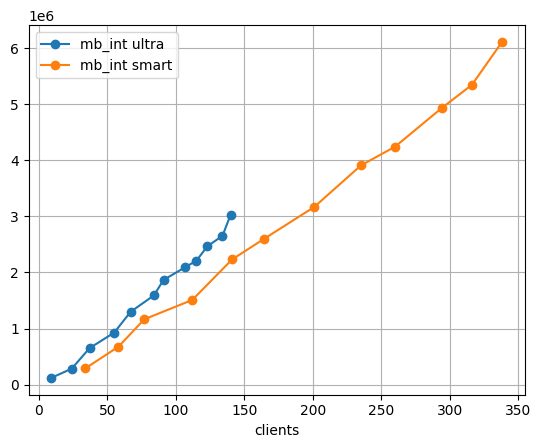

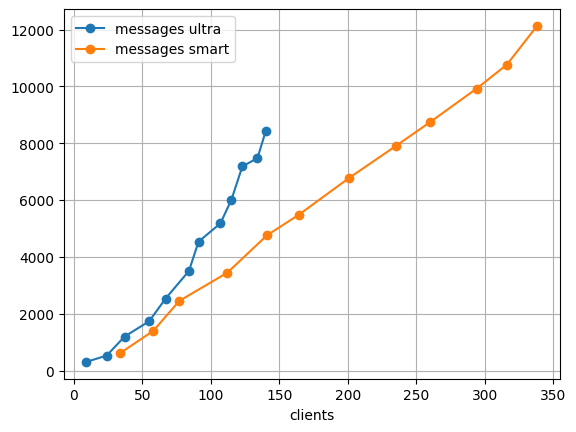

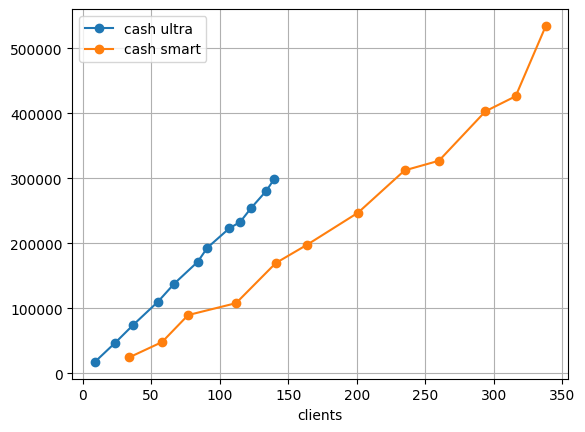

In [52]:
for i in chart_smart:
    try:
        ax = chart_ultra.plot(x='clients', y=i, style='o-', grid=True, label=(i+' ultra'))
        chart_smart.plot(x='clients', y=i, style='o-', grid=True, label=(i+' smart'), ax=ax, legend=True)
    except:
        False

Пользователи тарифа "smart" пользуются услугами звонков сообщений и интернеса достаточно симметрично. Тогда как у пользователей тарифа "ultra" график сообщений при одинаковом количестве пользователей практически на одном уровне, а затем задирается вверх, похоже что пользователи дорогого тарифа начинают более активно пользоваться привелегией в количестве бесплатных сообщений и график ближе к параболе, а не к прямой. Так же подтверждается очевидный факт, что те у кого более дорогой тариф чаще пользуются услугами.

In [53]:
for i in range(1,6):
    chart_smart['mean_' + chart_smart.columns[i]] = chart_smart[chart_smart.columns[i]]/chart_smart['clients']
    chart_ultra['mean_' + chart_ultra.columns[i]] = chart_ultra[chart_ultra.columns[i]]/chart_ultra['clients']

In [54]:
chart_smart    #посчитали средние

,clients,calls_time,calls,mb_int,messages,cash,mean_calls_time,mean_calls,mean_mb_int,mean_messages,mean_cash
0,34.0,7128.0,941.0,289972.0,620.0,24522.0,209.647059,27.676471,8528.588235,18.235294,721.235294
1,58.0,17766.0,2331.0,673806.0,1397.0,48112.0,306.310345,40.189655,11617.344828,24.086207,829.517241
2,77.0,30841.0,4183.0,1165103.0,2453.0,89592.0,400.532468,54.324675,15131.207792,31.857143,1163.532468
3,112.0,42224.0,5747.0,1510441.0,3443.0,107953.0,377.000000,51.312500,13486.080357,30.741071,963.866071
4,141.0,56175.0,7789.0,2232418.0,4762.0,169632.0,398.404255,55.241135,15832.751773,33.773050,1203.063830
5,164.0,66699.0,9110.0,2594881.0,5478.0,197970.0,406.701220,55.548780,15822.445122,33.402439,1207.134146
6,201.0,84277.0,11402.0,3170051.0,6784.0,247052.0,419.288557,56.726368,15771.398010,33.751244,1229.114428
7,235.0,101800.0,13860.0,3910450.0,7905.0,312129.0,433.191489,58.978723,16640.212766,33.638298,1328.208511
8,260.0,114421.0,15482.0,4246480.0,8746.0,326936.0,440.080769,59.546154,16332.615385,33.638462,1257.446154
9,294.0,128859.0,17629.0,4935335.0,9927.0,403031.0,438.295918,59.962585,16786.853741,33.765306,1370.853741


In [55]:
chart_ultra

,clients,calls_time,calls,mb_int,messages,cash,mean_calls_time,mean_calls,mean_mb_int,mean_messages,mean_cash
0,9.0,3968.0,535.0,118392.0,304.0,17550.0,440.888889,59.444444,13154.666667,33.777778,1950.000000
1,24.0,7312.0,997.0,282920.0,527.0,47400.0,304.666667,41.541667,11788.333333,21.958333,1975.000000
2,37.0,18614.0,2504.0,649480.0,1195.0,74550.0,503.081081,67.675676,17553.513514,32.297297,2014.864865
3,55.0,25854.0,3525.0,926489.0,1736.0,110100.0,470.072727,64.090909,16845.254545,31.563636,2001.818182
4,67.0,35166.0,4858.0,1298674.0,2536.0,138150.0,524.865672,72.507463,19383.194030,37.850746,2061.940299
5,84.0,41364.0,5606.0,1591290.0,3505.0,171450.0,492.428571,66.738095,18943.928571,41.726190,2041.071429
6,91.0,50987.0,6896.0,1867008.0,4536.0,193050.0,560.296703,75.780220,20516.571429,49.846154,2121.428571
7,107.0,56129.0,7628.0,2096759.0,5183.0,222900.0,524.570093,71.289720,19595.878505,48.439252,2083.177570
8,115.0,63669.0,8579.0,2210765.0,6013.0,232800.0,553.643478,74.600000,19224.043478,52.286957,2024.347826
9,123.0,70458.0,9517.0,2468061.0,7187.0,254250.0,572.829268,77.373984,20065.536585,58.430894,2067.073171


In [56]:
import numpy as np
disp_smart = {}    #словарь для дисперсии тарифа
k=0
for name in global_table:    #перебор названий столбцов
    if (0<k<49) or (k>55):    #берем тоько нужные столбцы
        book_name = name.split('_')[0] + '_' + name.split('_')[1] + '_disp'    #уникальное имя ключа в словаре, основанное на имени нужного столбца
        if book_name in disp_smart:    #если уникальное имя уже есть, то добавляем в список значений новое
            disp_smart[book_name] = disp_smart[book_name] + [np.var(global_table.loc[global_table[name] != 0].query('tariff == "smart"')[name], ddof=1)]
        else:    #если нету то добовляем ключ и его первое значение
            disp_smart[book_name] = [np.var(global_table.loc[global_table[name] != 0].query('tariff == "smart"')[name], ddof=1)]
    k = k + 1

In [57]:
disp_ultra = {}
k=0
for name in global_table:
    if (0<k<49) or (k>55):
        book_name = name.split('_')[0] + '_' + name.split('_')[1] + '_disp'
        if book_name in disp_ultra:
            disp_ultra[book_name] = disp_ultra[book_name] + [np.var(global_table.loc[global_table[name] != 0].query('tariff == "ultra"')[name], ddof=1)]
        else:
            disp_ultra[book_name] = [np.var(global_table.loc[global_table[name] != 0].query('tariff == "ultra"')[name], ddof=1)]
    k = k + 1

In [58]:
stats_smart = pd.DataFrame(disp_smart)    #для наглядности сделаем новую таблицу для дисперсий и стандартных отклонений

In [59]:
for i in stats_smart:
    name = i.split('_')[0] + '_' + i.split('_')[1] + '_dev'
    stats_smart[name] = np.sqrt(stats_smart[i])
stats_smart

,calls_sum_disp,calls_count_disp,int_sum_disp,mess_count_disp,cash_month_disp,calls_sum_dev,calls_count_dev,int_sum_dev,mess_count_dev,cash_month_dev
0,25239.386809,433.134581,4.166090e+07,252.133333,1.959336e+05,158.869087,20.811886,6454.525225,15.878707,442.643852
1,38029.972172,644.858137,3.915169e+07,440.465714,2.994773e+05,195.012749,25.394057,6257.131355,20.987275,547.245166
2,38523.594327,652.116883,3.407278e+07,669.780477,5.028446e+05,196.274283,25.536579,5837.189240,25.880117,709.115342
3,36520.252252,660.739302,3.257102e+07,517.865680,3.210277e+05,191.102727,25.704850,5707.102473,22.756662,566.593082
4,36358.585410,643.984296,3.585187e+07,638.775776,5.409338e+05,190.679274,25.376846,5987.642917,25.274014,735.482011
5,31327.208135,554.592668,3.363981e+07,731.635801,5.649988e+05,176.994938,23.549791,5799.983926,27.048767,751.664048
6,33858.106318,606.619751,3.488735e+07,719.352468,5.427566e+05,184.005724,24.629652,5906.551412,26.820747,736.720186
7,35808.727780,622.667547,3.032556e+07,767.213054,6.394241e+05,189.231942,24.953307,5506.864633,27.698611,799.639969
8,34580.133549,613.515549,2.707902e+07,702.505555,5.472638e+05,185.957343,24.769246,5203.750313,26.504821,739.772824
9,36516.418837,629.749334,3.444301e+07,736.503019,7.280000e+05,191.092697,25.094807,5868.816463,27.138589,853.229142


In [60]:
stats_ultra = pd.DataFrame(disp_ultra)

In [61]:
for i in stats_ultra:
    name = i.split('_')[0] + '_' + i.split('_')[1] + '_dev'
    stats_ultra[name] = np.sqrt(stats_ultra[i])
stats_ultra

,calls_sum_disp,calls_count_disp,int_sum_disp,mess_count_disp,cash_month_disp,calls_sum_dev,calls_count_dev,int_sum_dev,mess_count_dev,cash_month_dev
0,78384.611111,1733.777778,4.722308e+07,765.285714,0.000000,279.972518,41.638657,6871.905485,27.663798,0.000000
1,92586.231884,1678.693841,1.099091e+08,713.395833,7173.913043,304.279858,40.971866,10483.753313,26.709471,84.698955
2,117100.798799,2010.447447,1.201890e+08,1826.666667,43175.675676,342.199940,44.838013,10963.073083,42.739521,207.787573
3,69343.732946,1202.293179,9.464035e+07,1408.256410,38515.151515,263.331982,34.674100,9728.326976,37.526743,196.252775
4,78923.745040,1505.927579,9.682183e+07,1559.553544,170688.602442,280.933702,38.806283,9839.808404,39.491183,413.144772
5,89810.575000,1470.542901,8.316552e+07,1935.672999,104648.235800,299.684125,38.347658,9119.513253,43.996284,323.493796
6,91827.230799,1698.486938,9.784721e+07,2190.730974,203285.714286,303.030082,41.212704,9891.774681,46.805245,450.872171
7,95801.290691,1762.663240,1.073301e+08,2022.966432,159761.505907,309.517836,41.984083,10360.026326,44.977399,399.701771
8,103299.097789,1831.352498,8.766161e+07,1906.763270,60937.070938,321.401770,42.794305,9362.777880,43.666501,246.854352
9,102369.100681,1896.074823,9.372540e+07,2426.606511,152533.986405,319.951716,43.543941,9681.187768,49.260598,390.555997


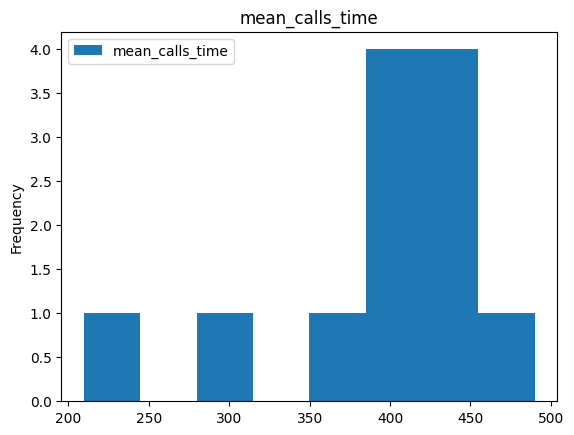

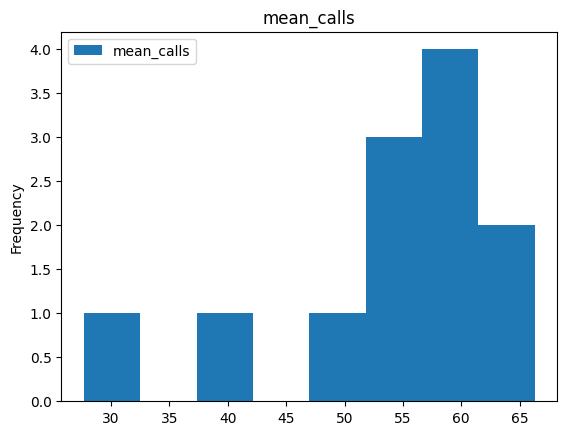

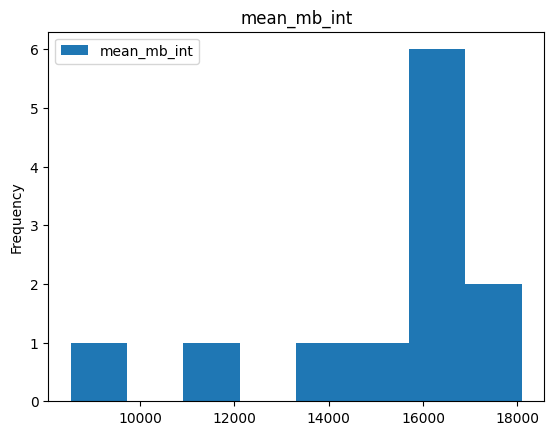

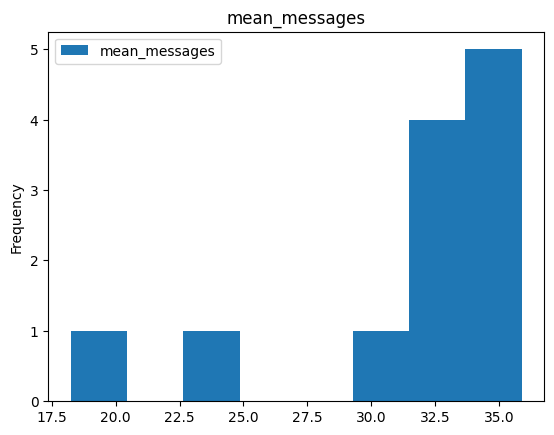

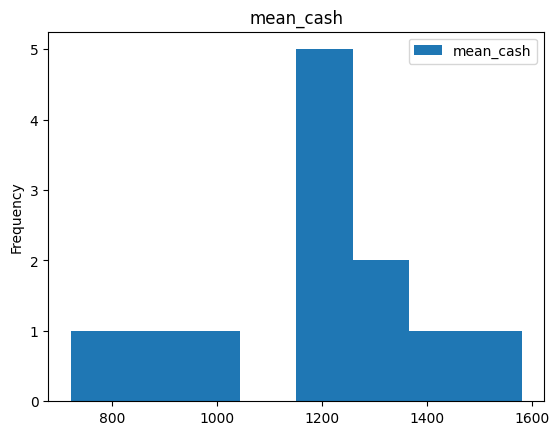

In [62]:
k = 0
for name in chart_smart:
    if k > 5:
        chart_smart.plot(kind='hist', y=name, title=name, bins=8)
        plt.show()
    k = k + 1

Предположительно данные распределены нормально, то можно сказать, что все они скошены влево, кроме средних сумм за тариф, большая часть приходится на 1200, что как мне кажется много для недорогого тарифа.

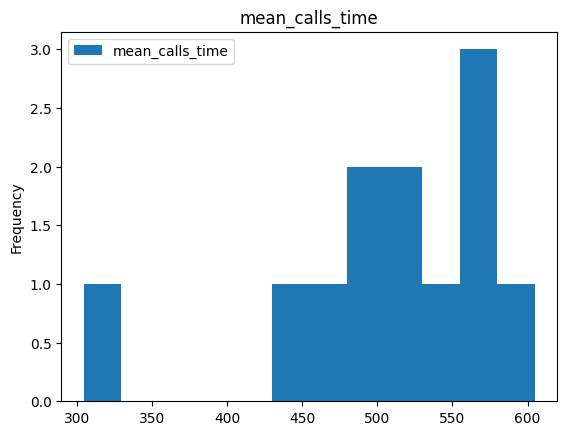

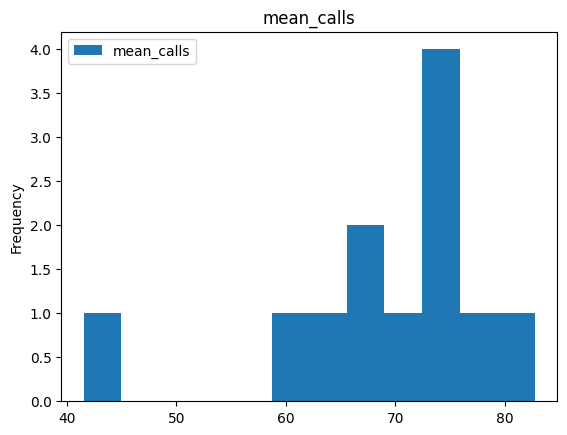

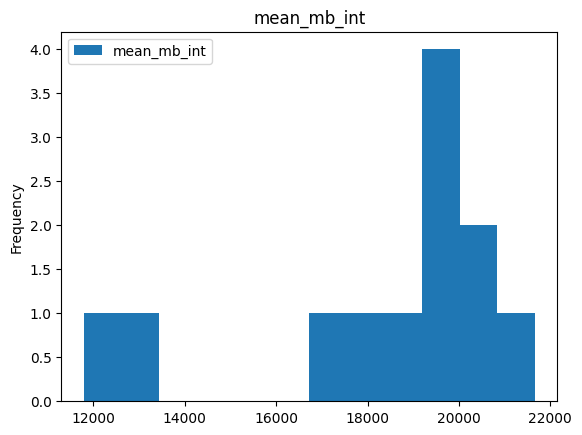

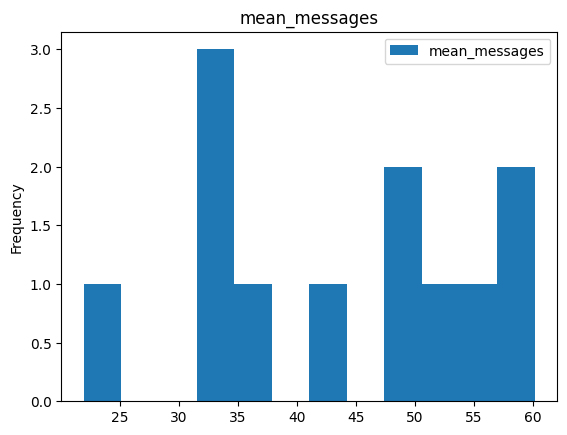

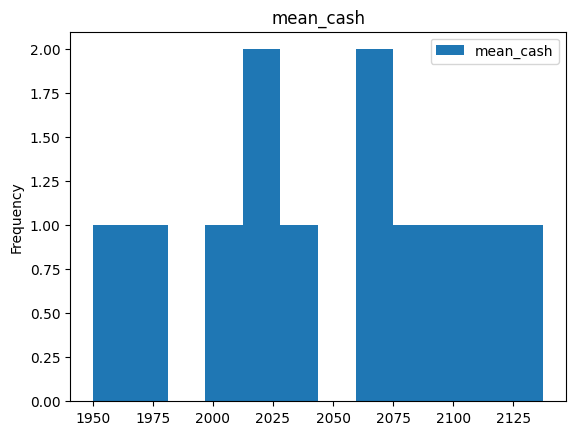

In [63]:
k = 0
for name in chart_ultra:
    if k > 5:
        chart_ultra.plot(kind='hist', y=name, title=name, bins=12)
        plt.show()
    k = k + 1

Похожая ситуация по другому тарифу на всех гистограммах кроме той которая показывает сообщения. 

# Проверка гипотез

## Средние выручки тарифов различны

Получается нам нужно сравнить средние выручки генеральных совокупностей обоих тарифов по их выборкам из global_table и каждая выборка будет состоять из помесячной платы каждого клиента соответствующего тарифа.

In [64]:
smart_cash = []    #выборка с тарифами
ultra_cash = []
def sample_tarif(row):    #функция ничего не возвращает, а только добавляет данные в выборку
    if row['tariff'] == 'smart':
        for i in range(1,13):
            if row['cash_month_' + str(i)] != 0:
                smart_cash.append(row['cash_month_' + str(i)])
    else:
        for i in range(1,13):
            if row['cash_month_' + str(i)] != 0:
                ultra_cash.append(row['cash_month_' + str(i)])
global_table.apply(sample_tarif, axis=1)

0      None
1      None
2      None
3      None
4      None
       ... 
495    None
496    None
497    None
498    None
499    None
Length: 500, dtype: object

In [65]:
from scipy import stats as st
alpha = .01
results_tarif = st.ttest_ind(smart_cash, ultra_cash, equal_var=False)
results_tarif.pvalue

1.1319039460228368e-244

Нулевая гипотеза - средние двух генеральных совокупностей тарифов "smart" и "ultra" равны между собой, соответственно альтернативная - средние не равны между собой. Уровень статистической значимости взяли 1%. Дисперсии не равны между собой.

In [66]:
alpha > results_tarif.pvalue

True

Значит мы отвергаем нашу нулевую гипотезу

## Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [67]:
mosc_cash = []    #выборка из Москвы
other_cash = []
def sample_city(row):    #функция ничего не возвращает, а только добавляет данные в выборку
    if row['city'] == 'Москва':
        for i in range(1,13):
            if row['cash_month_' + str(i)] != 0:
                mosc_cash.append(row['cash_month_' + str(i)])
    else:
        for i in range(1,13):
            if row['cash_month_' + str(i)] != 0:
                other_cash.append(row['cash_month_' + str(i)])
global_table.apply(sample_city, axis=1)

0      None
1      None
2      None
3      None
4      None
       ... 
495    None
496    None
497    None
498    None
499    None
Length: 500, dtype: object

In [68]:
from scipy import stats as st
alpha = .05
results_city = st.ttest_ind(mosc_cash, other_cash)
results_city.pvalue

0.4740497756455466

Нулевая гипотеза - средние двух генеральных совокупностей одна Московская другая остальные равны между собой, соответственно альтернативная заявляет, что средние не равны между собой. Уровень статистической значимости возьмем 5%. Дисперсии примем равные между собой.

In [69]:
alpha > results_city.pvalue

False

Мы не отвергаем нулевую гипотезу, значит мы не доказали, что средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других городов.

# Выводы

Изучили данные пользователей двух тарифов "Смарт" и "Ультра".  
Средние траты за месяц на тарифе "Смарт" - 1324, дисперсия - 367285, на тарифе "Ультра" - 2086, дисперсия - 89121. Гипотезу, что средние выручки обоих тарифов одинаковы опровергли, тариф "Ультра" обходится явно дороже тарифа "Смарт". Траты клиентов из Москвы статистически значимо не отличаются от трат клиентов из регионов.